Удинский, Э-1813

In [5]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import math
from matplotlib import style
import inspect

style.use('ggplot')
style.use('seaborn-ticks')

`Passive_search().rep()` - отчет по решению  
`Passive_search().rough_plot()` - график только с участками разбиения  
`Passive_search().smooth_plot()` - гладкий график с точкой минимума  

In [6]:
def f(x):
    return x + 2/x

In [7]:
class Passive_search:
    def __init__(self, f, a, b, e):
        raw_f = inspect.getsource(f)
        self.func = raw_f[raw_f.find('return') + 6:].strip()
        self.bounds = [a, b]
        self.e = e
        self.prec = 4
        
    def f(self, x):
        return f(x)
        
    def data(self):
        f, a, b, e = self.f, self.bounds[0], self.bounds[1], self.e
        k = (b-a)/e
        i = 0
        points = {}
        while i <= k:
            x = a + ((b-a)/k)*i
            points[x] = f(x)
            i += 1
        return points
    
    def res(self):
        points = self.data()
        return [min(points, key = points.get), points[min(points, key = points.get)]]
    
    def smooth_plot(self):
        f, a, b, e = self.f, self.bounds[0], self.bounds[1], self.e
        res = self.res()
        
        fig, ax = plt.subplots(figsize = (12, 6))
        x_space = np.linspace(a, b, round((b-a)*100))
        ax.scatter(res[0], res[1], label = f'min f(x) = {round(res[1], self.prec)}')
        ax.plot(x_space, [f(x) for x in x_space], c = 'black', label = f'f(x) = {self.func}')

        ax.set_xlabel('X', size = 15, fontweight = 500 )
        ax.set_ylabel('Y', size = 15, fontweight = 500 )
        ax.legend( prop={'size': 14})
        return(ax)
        
    def rough_plot(self):
        f, a, b, e = self.f, self.bounds[0], self.bounds[1], self.e
        res = self.res()
        
        fig, ax = plt.subplots(figsize = (12, 6))
        ax.scatter(res[0], res[1], label = f'min f(x) = {round(res[1], self.prec)}')
        ax.plot(list(self.data().keys()), self.data().values(), c = 'black', label = f'f(x) = {self.func}')

        ax.set_xlabel('X', size = 15, fontweight = 500 )
        ax.set_ylabel('Y', size = 15, fontweight = 500 )
        ax.legend( prop={'size': 14})
        return(ax)
    
    def rep(self):
        return print(f'Минимум функции f(x) = {self.func}, равный {round(self.res()[1], self.prec)}  достигается при x = {round(self.res()[0], self.prec)} с точностью e = {self.e}') 
        

In [8]:
task1 = Passive_search(f, 0.5, 3.5, 0.5)

In [9]:
task1.rep()

Минимум функции f(x) = x + 2/x, равный 2.8333  достигается при x = 1.5 с точностью e = 0.5


<AxesSubplot:xlabel='X', ylabel='Y'>

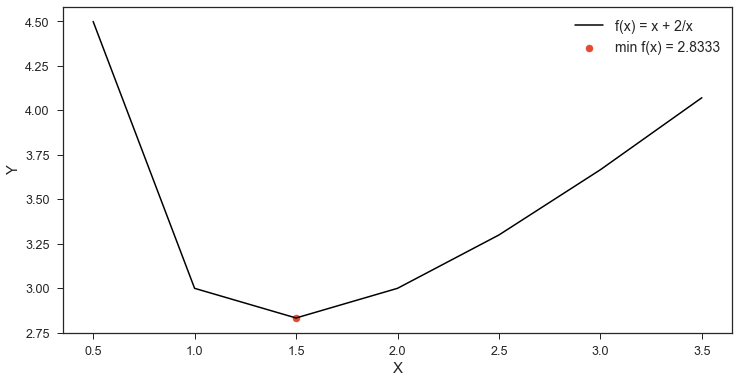

In [10]:
task1.rough_plot()

<AxesSubplot:xlabel='X', ylabel='Y'>

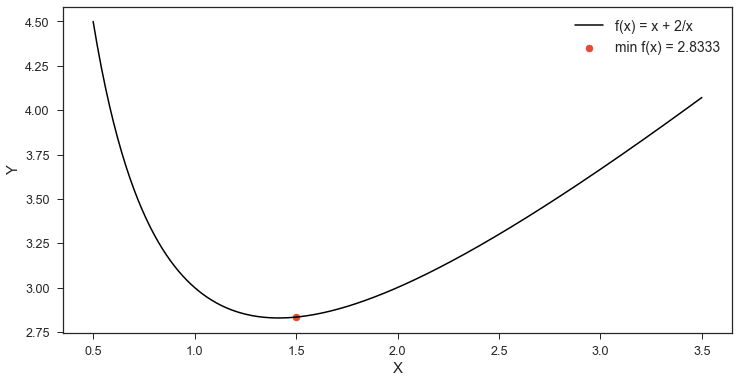

In [11]:
task1.smooth_plot()